# Data Preprocessing for Modeling 

In [1]:
# Standardizing all numeric variables 
from sklearn.preprocessing import StandardScaler
from pyspark.sql.types import StringType 
from pyspark.sql.functions import col 
import numpy as np
import pandas as pd 

from numpy import random 
random.seed(seed=12345)

In [2]:
import pandas as pd
from glob import glob
np.random.seed(12345)

# Path to the CSV files
path = '/GWSB/home/andrewrenga15/Desktop/sample/Sample_*.csv'

# Use glob to match the pattern and get a list of file names
files = glob(path)

# Read each CSV file and store them in a list
dfs = [pd.read_csv(file) for file in files]

# Concatenate all DataFrames in the list into one
df = pd.concat(dfs, ignore_index=True)

/tmp/ipykernel_1023307/350939096.py:12: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs = [pd.read_csv(file) for file in files]


In [3]:
np.random.seed(12345)
# Drop specified columns
df = df.drop(columns=['LOAN SEQUENCE NUMBER','MONTHLY REPORTING PERIOD', 'CURRENT ACTUAL UPB', 'OrigQuarter'])
df.head()

,CURRENT LOAN DELINQUENCY STATUS,LOAN AGE,CURRENT INTEREST RATE,ESTIMATED LOAN TO VALUE (ELTV),DEFAULT,CREDIT SCORE,FIRST TIME HOMEBUYER FLAG,OCCUPANCY STATUS,ORIGINAL INTEREST RATE,PROPERTY TYPE,LOAN PURPOSE,SELLER NAME,OrigYear,OrigDate,index_sa,UNRATE,inflation,% Change in UPB
0,0,0,6.5,Undefined,0,736,N,P,6.5,MH,P,Other sellers,2008,2008Q1,212.33,4.9,4.0,0.0
1,0,1,6.5,1.0088,0,736,N,P,6.5,MH,P,Other sellers,2008,2008Q1,210.47,5.1,4.0,0.0
2,0,2,6.5,1.02,0,736,N,P,6.5,MH,P,Other sellers,2008,2008Q1,208.16,5.0,3.9,0.0
3,0,3,6.5,1.0313,0,736,N,P,6.5,MH,P,Other sellers,2008,2008Q1,205.89,5.4,4.2,0.0
4,0,4,6.5,1.038,0,736,N,P,6.5,MH,P,Other sellers,2008,2008Q1,204.55,5.6,5.0,0.0


In [4]:
np.random.seed(12345)

full_timeseries = df.sort_values(by='OrigDate', ascending=True)

In [5]:
np.random.seed(12345)

full_timeseries = full_timeseries.dropna(subset=["% Change in UPB"])

In [6]:
np.random.seed(12345)

# Convert Decimal to Percentage in the % Change in UPB Column
full_timeseries['% Change in UPB'] = full_timeseries['% Change in UPB'] * 100
full_timeseries.tail()

,CURRENT LOAN DELINQUENCY STATUS,LOAN AGE,CURRENT INTEREST RATE,ESTIMATED LOAN TO VALUE (ELTV),DEFAULT,CREDIT SCORE,FIRST TIME HOMEBUYER FLAG,OCCUPANCY STATUS,ORIGINAL INTEREST RATE,PROPERTY TYPE,LOAN PURPOSE,SELLER NAME,OrigYear,OrigDate,index_sa,UNRATE,inflation,% Change in UPB
4550634,0,1,6.375,0.9925,0,791,N,P,6.375,PU,P,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",2023,2023Q2,405.61,3.6,3.0,-0.21
4550633,0,0,6.375,Undefined,0,791,N,P,6.375,PU,P,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",2023,2023Q2,403.44,3.7,4.0,0.00
4550632,0,4,7.375,0.9667,0,743,N,P,7.375,SF,P,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",2023,2023Q2,414.98,3.8,3.7,-0.57
4550630,0,2,7.375,0.9808,0,743,N,P,7.375,SF,P,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",2023,2023Q2,409.00,3.5,3.2,-0.57
4550534,0,3,5.875,0.9791,0,717,N,P,5.875,SF,P,Other sellers,2023,2023Q2,412.04,3.8,3.7,0.00


In [7]:
np.random.seed(12345)

total_rows = len(full_timeseries) 
print(f"Total number of rows in the DataFrame: {total_rows}")

Total number of rows in the DataFrame: 4689164


In [8]:
np.random.seed(12345)

# Reset the index 
full_timeseries.reset_index(drop=True, inplace=True)

In [9]:
np.random.seed(12345)

# Now that the DataFrame is sorted and the index has been reset, fetch indices for 2022 and 2023
end_test_idx = total_rows

print(f"End of test index (inclusive): {end_test_idx}")

End of test index (inclusive): 4689164


In [10]:
np.random.seed(12345)

# Calculate the index that represents 80% of the data up to the end of 2023
split_index = int(end_test_idx * 0.8)

# Print the calculated split index
print(f"Training data ends at index: {split_index}")
print(f"Testing data starts at index: {split_index + 1} and ends at index: {end_test_idx}")

Training data ends at index: 3751331
Testing data starts at index: 3751332 and ends at index: 4689164


In [11]:
np.random.seed(12345)

full_timeseries['ESTIMATED LOAN TO VALUE (ELTV)'] = pd.to_numeric(full_timeseries['ESTIMATED LOAN TO VALUE (ELTV)'], errors='coerce').fillna(-1)

In [12]:
np.random.seed(12345)

contains_undefined = full_timeseries['ESTIMATED LOAN TO VALUE (ELTV)'].isin(['undefined']).any()

print("Is 'undefined' present in the ELTV column?", contains_undefined)

Is 'undefined' present in the ELTV column? False


In [13]:
np.random.seed(12345)

full_timeseries['CURRENT LOAN DELINQUENCY STATUS'] = full_timeseries['CURRENT LOAN DELINQUENCY STATUS'].astype(str)
full_timeseries['CURRENT INTEREST RATE'] = full_timeseries['CURRENT INTEREST RATE'].astype(np.float32)
full_timeseries['ESTIMATED LOAN TO VALUE (ELTV)'] = full_timeseries['ESTIMATED LOAN TO VALUE (ELTV)'].astype(np.float32)
full_timeseries['ORIGINAL INTEREST RATE'] = full_timeseries['ORIGINAL INTEREST RATE'].astype(np.float32)
full_timeseries['index_sa'] = full_timeseries['index_sa'].astype(np.float32)
full_timeseries['UNRATE'] = full_timeseries['UNRATE'].astype(np.float32)
full_timeseries['inflation'] = full_timeseries['inflation'].astype(np.float32)
full_timeseries['% Change in UPB'] = full_timeseries['% Change in UPB'].astype(np.float32)
full_timeseries['OrigYear'] = full_timeseries['OrigYear'].astype(str)

full_timeseries.drop(columns=['CURRENT LOAN DELINQUENCY STATUS'], inplace=True)
full_timeseries.drop(columns=['LOAN AGE'], inplace=True)

In [14]:
np.random.seed(12345)

column_types = full_timeseries.dtypes
print(column_types)

CURRENT INTEREST RATE             float32
ESTIMATED LOAN TO VALUE (ELTV)    float32
DEFAULT                             int64
CREDIT SCORE                        int64
FIRST TIME HOMEBUYER FLAG          object
OCCUPANCY STATUS                   object
ORIGINAL INTEREST RATE            float32
PROPERTY TYPE                      object
LOAN PURPOSE                       object
SELLER NAME                        object
OrigYear                           object
OrigDate                           object
index_sa                          float32
UNRATE                            float32
inflation                         float32
% Change in UPB                   float32
dtype: object


In [15]:
np.random.seed(12345)

import numpy as np
from sklearn.utils.class_weight import compute_class_weight

train = full_timeseries[:split_index]
y = train['DEFAULT']
arr = compute_class_weight(class_weight="balanced", classes=np.unique(y), y=y)

value1, value2 = arr
print(f"Testing data starts at index: {value1} and ends at index: {value2}")

Testing data starts at index: 0.549094301223153 and ends at index: 5.5922407239009555


In [16]:
np.random.seed(12345)

full_timeseries['Weight'] = full_timeseries['DEFAULT'].apply(lambda x: value1 if x == 0 else value2)
full_timeseries['Weight'] = full_timeseries['Weight'].astype(np.float32)

# PiML 

In [17]:
from piml import Experiment
np.random.seed(12345)

exp = Experiment()
exp.data_loader(data = full_timeseries, silent=True)

In [18]:
np.random.seed(12345)

exp.data_summary(feature_exclude=[], feature_type={"OrigYear": "categorical","Weight":"numerical"})

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

Numerical Attributes 
 
 
   
 name 
 n_missing 
 mean 
 std 
 min 
 q1 
 median 
 q3 
 max 
 
 
 
 
 0 
 CURRENT INTEREST RATE 
 0 
 5.2220 
 1.3092 
 1.9990 
 4.2500 
 5.0000 
 6.1250 
 46.2500 
 
 
 1 
 ESTIMATED LOAN TO VALUE (ELTV) 
 0 
 0.7952 
 0.3002 
 -1.0000 
 0.7130 
 0.8517 
 0.9607 
 2.3467 
 
 
 2 
 CREDIT SCORE 
 0 
 732.4845 
 403.2014 
 300.0000 
 673.0000 
 719.0000 
 764.0000 
 9999.0000 
 
 
 3 
 ORIGINAL INTEREST RATE 
 0 
 5.3453 
 1.2654 
 1.9990 
 4.3750 
 5.2500 
 6.2500 
 10.7500 
 
 
 4 
 index_sa 
 0 
 241.5146 
 65.9347 
 136.8600 
 192.0200 
 220.7800 
 268.3800 
 414.9800 
 
 
 5 
 UNRATE 
 0 
 5.8833 
 2.1356 
 3.4000 
 4.2000 
 5.1000 
 7.3000 
 14.8000 
 
 
 6 
 inflation 
 0 
 2.5223 
 1.9701 
 -2.1000 
 1.4000 
 2.1000 
 3.2000 
 9.1000 
 
 
 7 
 % Change in UPB 
 0 
 -7.9178 
 13.3202 
 -100.0000 
 -9.7100 
 -4.5100 
 -1.6600 
 138.3000 
 
 
 8 
 Weight 
 0 
 1.0006 
 1.4399 
 0.5491 
 0.5491 
 0.5491 
 0.5491 
 5.5922 
 
 
 

 
 Categorical Attributes 
 
 
   
 name 
 n_missing 
 n_unique 
 top1 
 top2 
 top3 
 n_others 
 
 
 
 
 0 
 DEFAULT 
 0 
 2 
 0.0 : 4269333 
 1.0 : 419831 
 0 
 0 
 
 
 1 
 FIRST TIME HOMEBUYER FLAG 
 0 
 3 
 N : 4071092 
 Y : 617879 
 9 : 193 
 0 
 
 
 2 
 OCCUPANCY STATUS 
 0 
 3 
 P : 4232195 
 I : 301236 
 S : 155733 
 0 
 
 
 3 
 PROPERTY TYPE 
 0 
 6 
 SF : 3745826 
 PU : 572753 
 CO : 303031 
 67554 
 
 
 4 
 LOAN PURPOSE 
 0 
 3 
 P : 1832745 
 N : 1628546 
 C : 1227873 
 0 
 
 
 5 
 SELLER NAME 
 0 
 96 
 Other sell : 2433082 
 WELLS FARG : 317236 
 COUNTRYWID : 184306 
 1754540 
 
 
 6 
 OrigYear 
 0 
 24 
 2003.0 : 316577 
 2004.0 : 298012 
 2005.0 : 284833 
 3789742 
 
 
 7 
 OrigDate 
 0 
 94 
 2003Q3 : 85785 
 2003Q2 : 79417 
 2004Q2 : 78070 
 4445892

Data Shape:(4689164, 17)


In [19]:
np.random.seed(12345)

custom_train_idx = np.arange(0, split_index)
custom_test_idx = np.arange(split_index+1, end_test_idx)
exp.data_prepare(target='DEFAULT', task_type='classification', sample_weight="Weight",
                train_idx=custom_train_idx, test_idx=custom_test_idx, random_state = 12345)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

,Config,Value
0,Excluded columns,[]
1,Target variable,DEFAULT
2,Sample weight,Weight
3,Task type,classification
4,Split method,manual
5,Test ratio,0.2
6,Random state,12345


In [51]:
np.random.seed(12345) 
exp.model_train()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [71]:
np.random.seed(12345) 
exp.model_interpret()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [52]:
np.random.seed(12345)
exp.model_diagnose()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

Confusion Matrix:
[[331766.63140762 136833.7552861 ]
 [114473.16938877 357657.35326958]]


0.7400152070265166

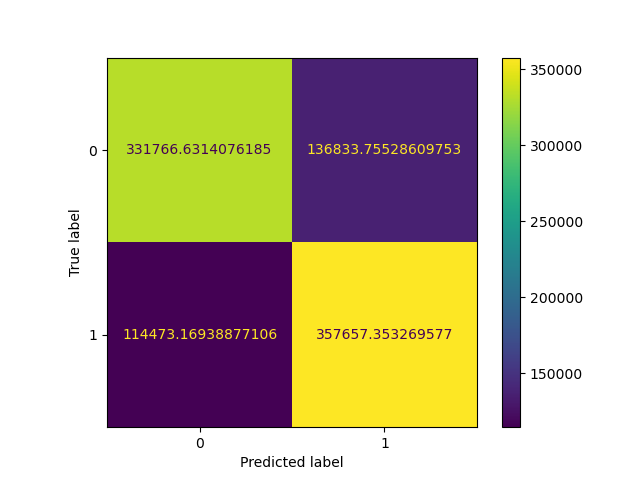

In [60]:
# Manually computing accuracy metrics due to PiML model diagnose error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, precision_recall_curve
np.random.seed(12345) 
np.set_printoptions(suppress=False)

model = exp.get_model('XGB2_v2')
test_data1 = full_timeseries.loc[split_index + 1:end_test_idx]
test_data1.drop(columns=['Weight','DEFAULT'], inplace=True)
pred_value = model.predict(test_data1) 

test_data = full_timeseries.loc[split_index + 1:end_test_idx]
true_value = test_data['DEFAULT']
conf_matrix = confusion_matrix(true_value, pred_value, sample_weight = test_data["Weight"])

print("Confusion Matrix:")
print(conf_matrix)

classes = test_data['DEFAULT'].unique()
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=classes)
disp.plot(values_format='')


f1_score(true_value, pred_value,sample_weight = test_data["Weight"])

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

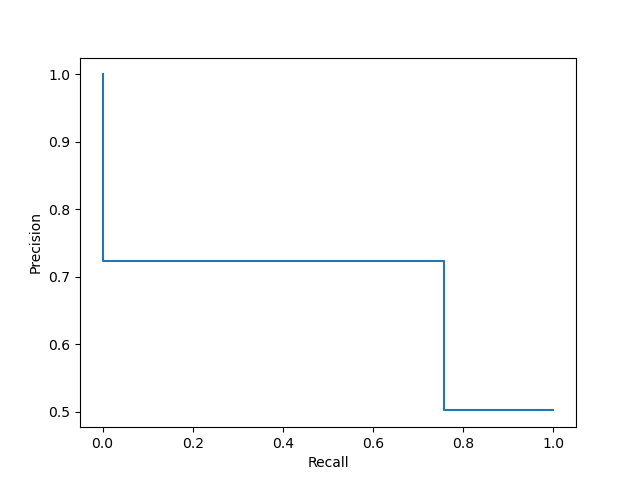

In [66]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

precision, recall, _ = precision_recall_curve(true_value, pred_value, sample_weight = test_data["Weight"])
curve = PrecisionRecallDisplay(precision=precision, recall=recall)
curve.plot()